## **Auto Insurance Fraud Detection | Applied Machine Learning Project**


---
####*Ziqing Li (zl648), Renata Anastasia (ra568)*

##I. Motivation

Auto insurance companies lose at least $7.5 billion a year due to fraudulent practices. Each fraudulent case might involve several parties such as drivers, passengers and car repair companies that conspire in making false or exaggerating the claims of car damage or injuries. As a result, claims investigations become very costly, time-consuming, and near impossible to check case-by-case. Furthermore, fraudulence contributes as one of the top factors why auto insurance costs have risen significantly since 2009 and even outpaced inflation, which is most likely to affect the financially unprepared young generation.


Fortunately, as technology rapidly advances, machine learning models can now be used by insurance companies to flag potential fraudulent activities from a large amount of claim data more accurately and more cost-efficiently. Additionally, it can help processing the huge claims dataset in a short period of time and identify hidden connections among variables. Eventually, the application of machine learning in insurance fraud detection could both help insurance companies to reduce risks and make auto insurance more affordable.


In this project, we are going to implement a machine learning model to detect suspicious patterns and potential fraud in claim processing and customer data, and we have initial planning as follows.


##II. Understand and Preprocess Data

####1. Download Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
! gdown --id 1PvygXw-b3_ZT78Rq80a9UGFn_MXCr3qI
df = pd.read_csv('fraud_oracle.csv')
df.head(10)

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PvygXw-b3_ZT78Rq80a9UGFn_MXCr3qI
To: /content/fraud_oracle.csv
100% 3.62M/3.62M [00:00<00:00, 93.1MB/s]


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [ ]:
#shape of data
df.shape

(15420, 33)

In [ ]:
#data information (null/type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
#overview of data distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


####2. Visualize some features

[Text(0.5, 1.0, 'Fraud Counts')]

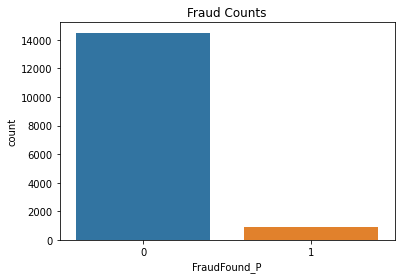

In [ ]:
# Fraud Counts

sns.countplot(x='FraudFound_P', data = df).set(title=
                                                'Fraud Counts')

In [ ]:
df['FraudFound_P'].sum()

923

Among 15420 auto claims records, there are ~1000 of them are flagged as fraud

#####a) categorical features

In [ ]:
##Which columns are categoric;
cat_col = [col for col in df.columns if df[col].dtypes == "O"]
cat_col

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

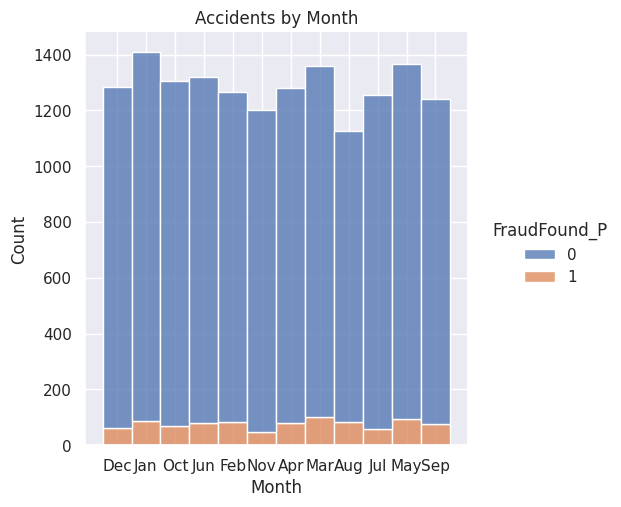

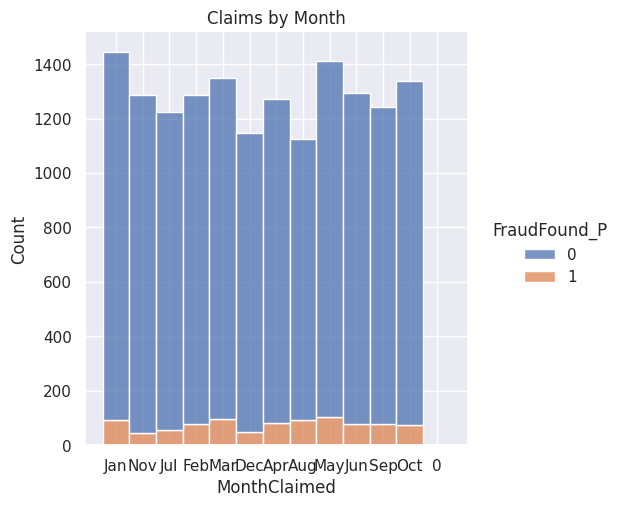

In [ ]:
# Claims counts by month

sns.set(font_scale=1)
p1 = sns.displot(x='Month', hue = 'FraudFound_P',data = df,multiple='stack').set(title=
                                                      'Accidents by Month')
p1.fig.set_dpi(100)

p2 = sns.displot(x='MonthClaimed', hue = 'FraudFound_P',data = df,multiple='stack').set(title=
                                                      'Claims by Month')
p2.fig.set_dpi(100)

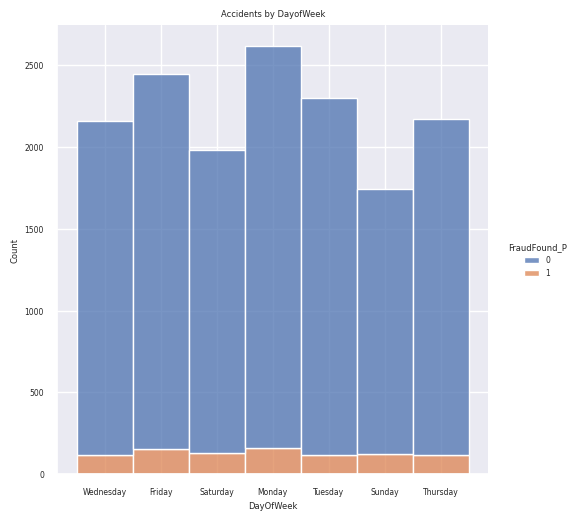

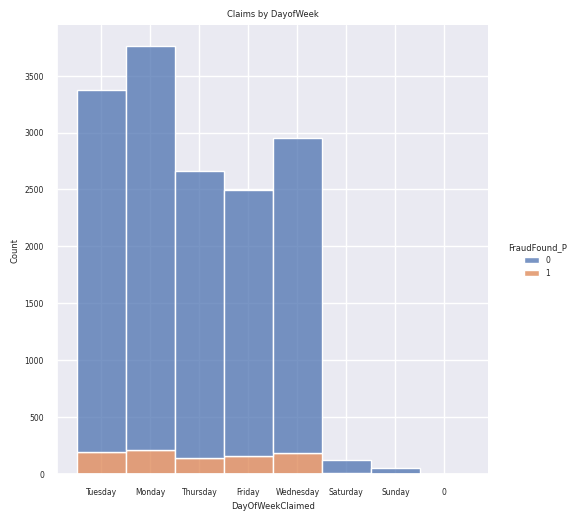

In [ ]:
# Claims counts by day of week

sns.set(font_scale=0.5)
p3 = sns.displot(x='DayOfWeek', hue = 'FraudFound_P',data = df,multiple='stack').set(title=
                                                      'Accidents by DayofWeek')
p3.fig.set_dpi(100)

p4 = sns.displot(x='DayOfWeekClaimed', hue = 'FraudFound_P',data = df,multiple='stack').set(title=
                                                      'Claims by DayofWeek')
p4.fig.set_dpi(100)
sns.set(rc = {'figure.figsize':(15,8)})

There's no significant seasonality on when the accident/fraud is more likely to happen.

In [ ]:
# Claims counts by Vehicle Make
df.groupby(["Make"]).size().sort_values(ascending=False)

Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
dtype: int64

In [ ]:
2801/ len(df)

0.18164721141374837

In [ ]:
df_f=df[df['FraudFound_P'] == 1]

In [ ]:
# Ages of vehicles by car brands
df_make_vehicle_age = df.groupby(["Make", "AgeOfVehicle"]).agg({"Make":"count"})
df_make_vehicle_age.columns = ["Counts"]
df_make_vehicle_age.reset_index(inplace=True)

# Plot Pie Charts for Top 6 brands

sns.set(font_scale=1)
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Pontiac"]["Counts"], 
                     name="Pontiac"),
              1, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Toyota"]["Counts"], 
                     name="Toyota"),
              1, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Honda"]["Counts"], 
                     name="Honda"),
              1, 3)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Mazda"]["Counts"], 
                     name="Mazda"),
              2, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Chevrolet"]["Counts"], 
                     name="Chevrolet"),
              2, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Accura"]["Counts"], 
                     name="Accura"),
              2, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Ages of vehicles involved in a claim by car brands (Top 6)",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pontiac', x=0.133, y=0.815, font_size=10, showarrow=False),
                 dict(text='Toyota', x=0.50, y=0.815, font_size=10, showarrow=False),
                dict(text='Honda', x=0.866, y=0.815, font_size=10, showarrow=False),
                dict(text='Mazda', x=0.133, y=0.194, font_size=10, showarrow=False),
                dict(text='Chevrolet', x=0.50, y=0.194, font_size=10, showarrow=False),
                dict(text='Accura', x=0.866, y=0.194, font_size=10, showarrow=False)])
fig.show()

In [ ]:
# Ages of vehicles by car brands
df_make_vehicle_age = df_f.groupby(["Make", "AgeOfVehicle"]).agg({"Make":"count"})
df_make_vehicle_age.columns = ["Counts"]
df_make_vehicle_age.reset_index(inplace=True)

# Plot Pie Charts for Top 6 brands
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Pontiac"]["Counts"], 
                     name="Pontiac"),
              1, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Toyota"]["Counts"], 
                     name="Toyota"),
              1, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Honda"]["Counts"], 
                     name="Honda"),
              1, 3)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Mazda"]["Counts"], 
                     name="Mazda"),
              2, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Chevrolet"]["Counts"], 
                     name="Chevrolet"),
              2, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"], 
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Accura"]["Counts"], 
                     name="Accura"),
              2, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Ages of vehicles involved in a Fraud by car brands (Top 6)",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pontiac', x=0.133, y=0.815, font_size=10, showarrow=False),
                 dict(text='Toyota', x=0.50, y=0.815, font_size=10, showarrow=False),
                dict(text='Honda', x=0.866, y=0.815, font_size=10, showarrow=False),
                dict(text='Mazda', x=0.133, y=0.194, font_size=10, showarrow=False),
                dict(text='Chevrolet', x=0.50, y=0.194, font_size=10, showarrow=False),
                dict(text='Accura', x=0.866, y=0.194, font_size=10, showarrow=False)])
fig.show()

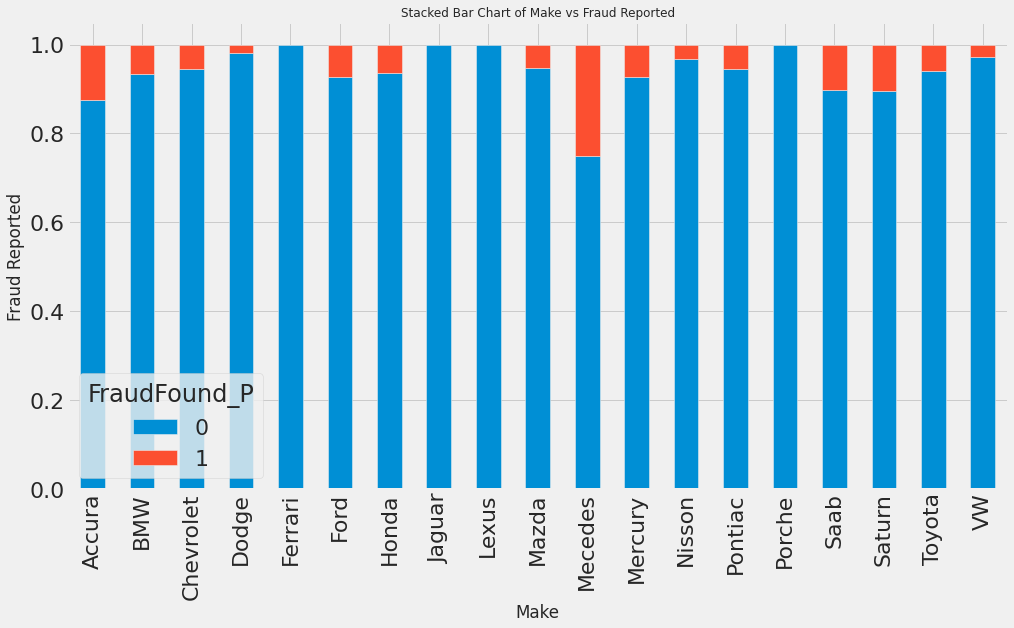

In [ ]:
sns.set(font_scale=2)
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.Make, df.FraudFound_P)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Make vs Fraud Reported', fontsize=12)
plt.xlabel('Make')
plt.ylabel('Fraud Reported')
plt.show()

Although Mecedes has significantly higher fraud proportion comparing to other make, it is potentially because there're only 4 Mecedes cases in our dataset; Accura, Saab, Saturn have relatively higher fraud rates.

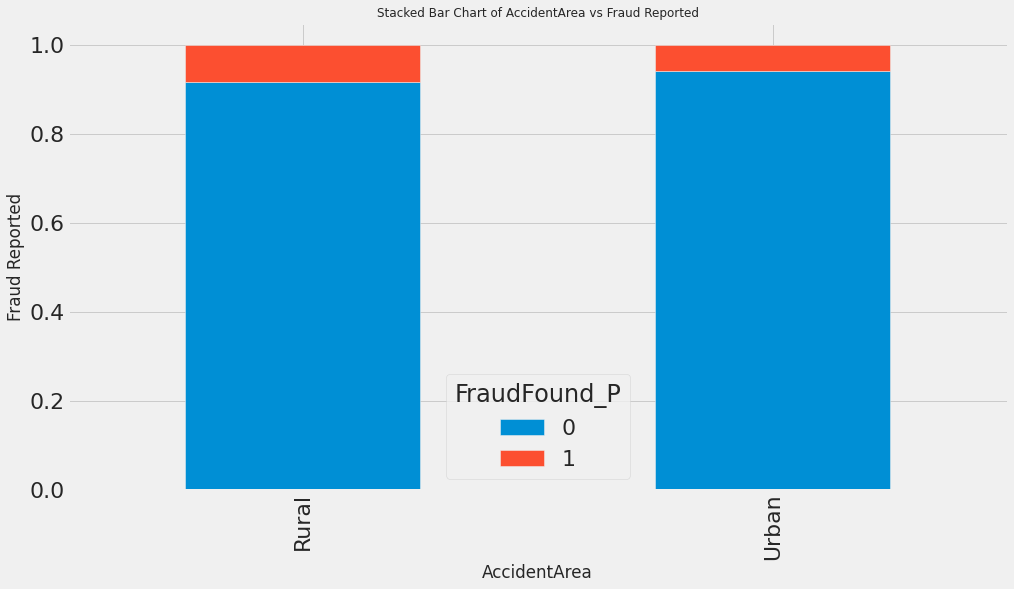

In [ ]:
# Claims counts by Area

plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.AccidentArea, df.FraudFound_P)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of AccidentArea vs Fraud Reported', fontsize=12)
plt.xlabel('AccidentArea')
plt.ylabel('Fraud Reported')
plt.show()

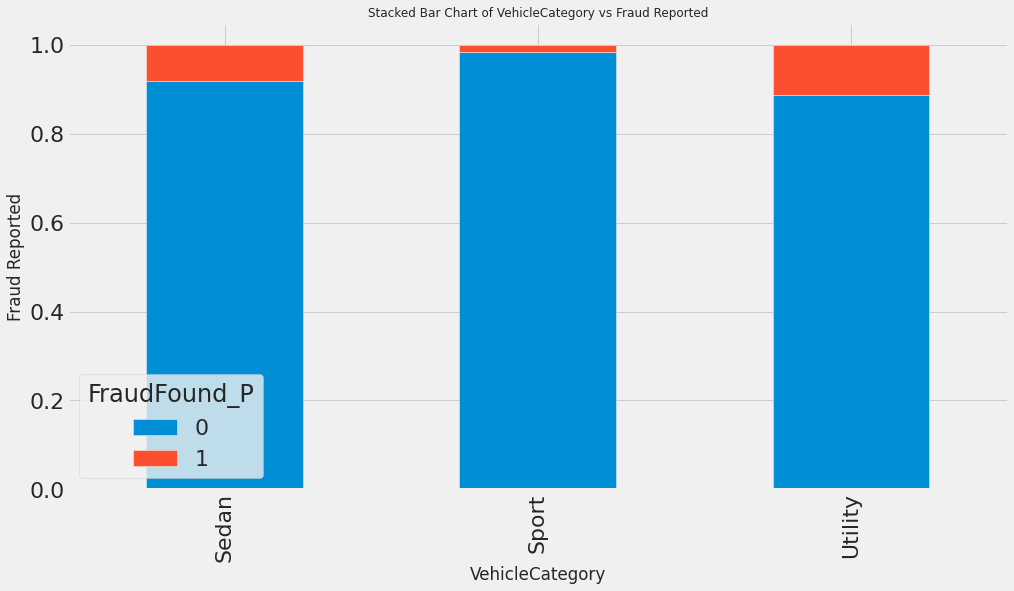

In [ ]:

plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.VehicleCategory, df.FraudFound_P)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of VehicleCategory vs Fraud Reported', fontsize=12)
plt.xlabel('VehicleCategory')
plt.ylabel('Fraud Reported')
plt.show()

Sport car has very low rate of fraud, Sedan and Utility have higher fraud rate

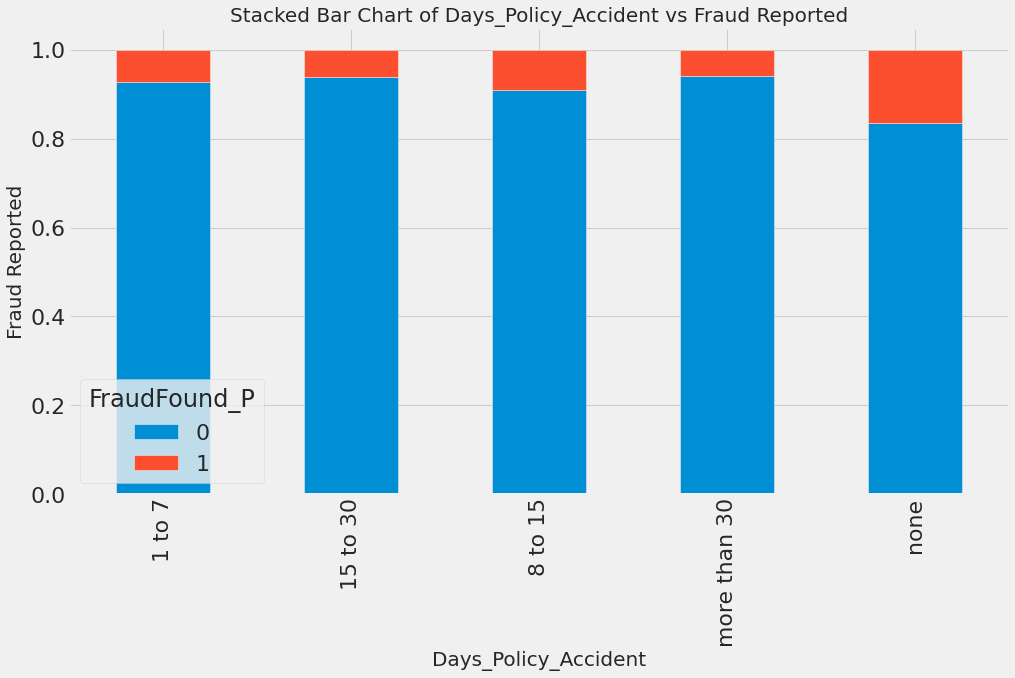

In [ ]:

plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.Days_Policy_Accident, df.FraudFound_P)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Days_Policy_Accident vs Fraud Reported', fontsize=20)
plt.xlabel('Days_Policy_Accident', fontsize=20)
plt.ylabel('Fraud Reported', fontsize=20)
plt.show()

Another strong indicator we found is when an accident is reported to have an accident on the same day as its insurance is issued, there's a very high chance that this claim is a fraud.


[Text(0.5, 1.0, 'Fraud Count by Police Report')]

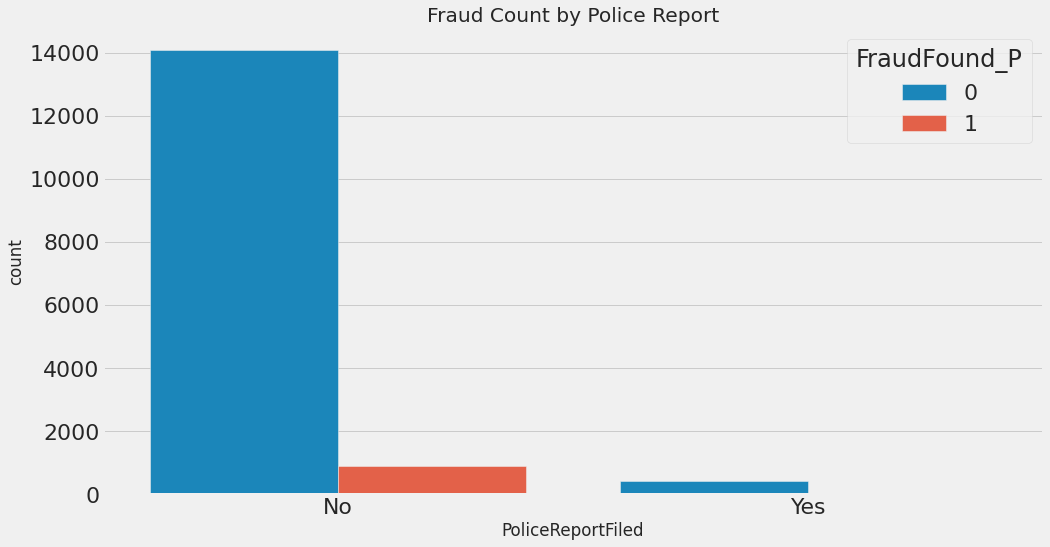

In [ ]:
sns.countplot(x='PoliceReportFiled', hue = 'FraudFound_P',data = df).set(title=
                                                      'Fraud Count by Police Report')


Almost all fraud cases do not have police report filed

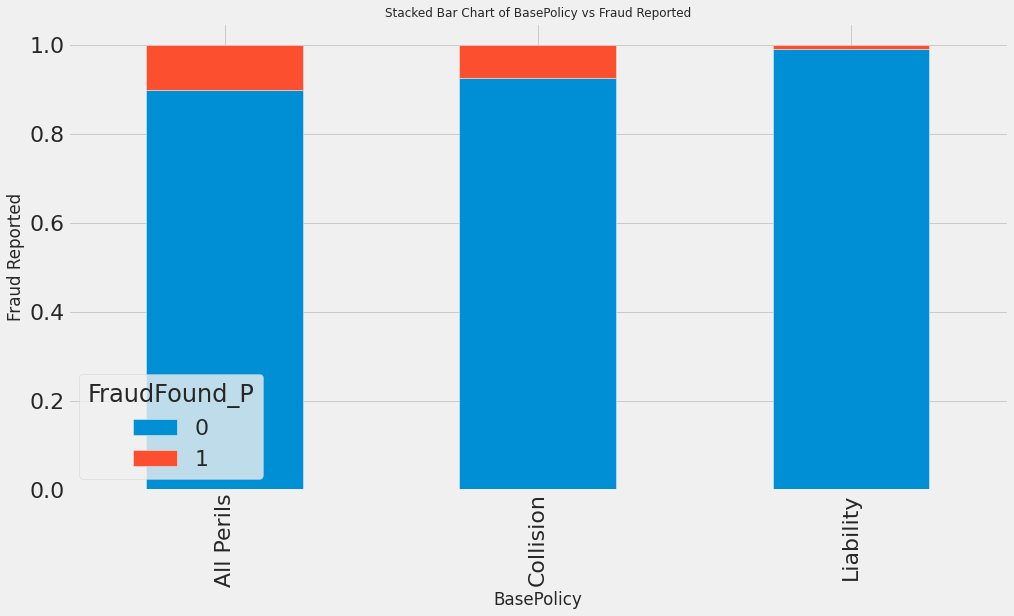

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.BasePolicy, df.FraudFound_P)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of BasePolicy vs Fraud Reported', fontsize=12)
plt.xlabel('BasePolicy')
plt.ylabel('Fraud Reported')
plt.show()


In [ ]:

df.groupby(["BasePolicy"]).size().sort_values(ascending=False)

BasePolicy
Collision     5962
Liability     5009
All Perils    4449
dtype: int64

All Perils policies have higher proportion of fraud; Liability insurance is les likely to be fraud

#####b)Continuous Features

[Text(0.5, 1.0, 'Histogram of Age')]

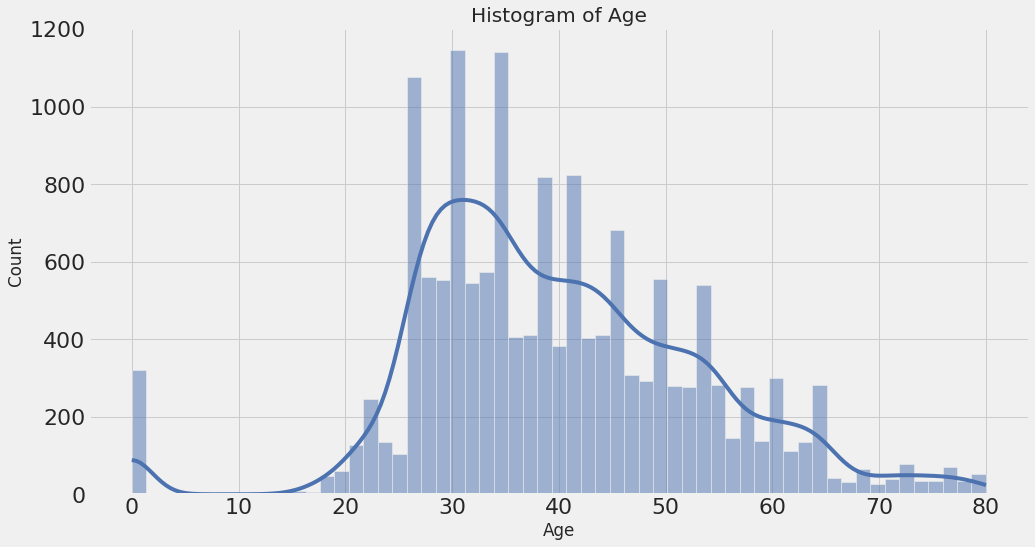

In [ ]:
sns.histplot(data=df, x='Age',kde=True).set(title='Histogram of Age')

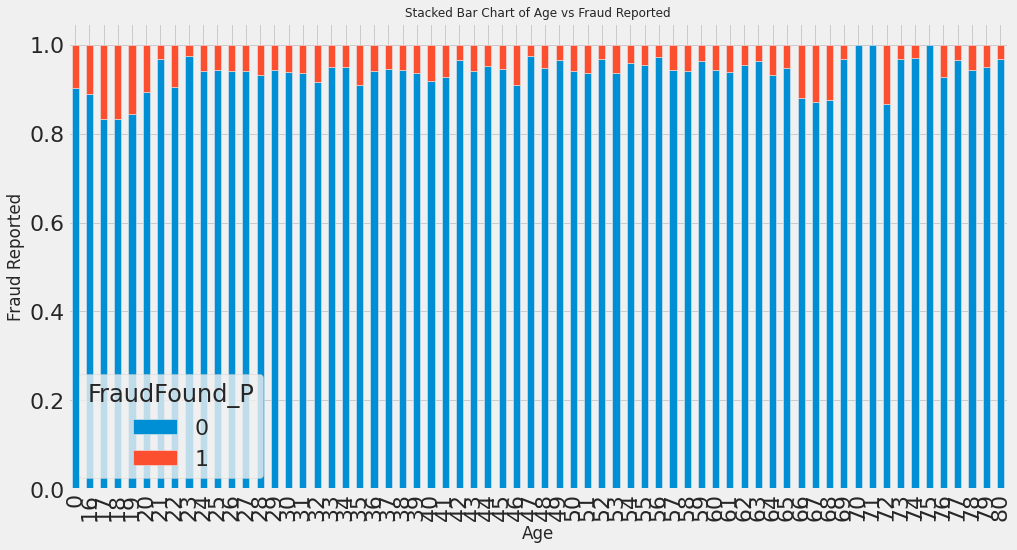

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.Age, df.FraudFound_P)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud Reported')
plt.show()

From above plot, age could be an important predictor for identifying fraud. Ages between 17-19 & 66-68 have higher proportion of fraud.

Moreover, there are ~300 records with age = 0, which is problematic and need to be adjusted in the next step.

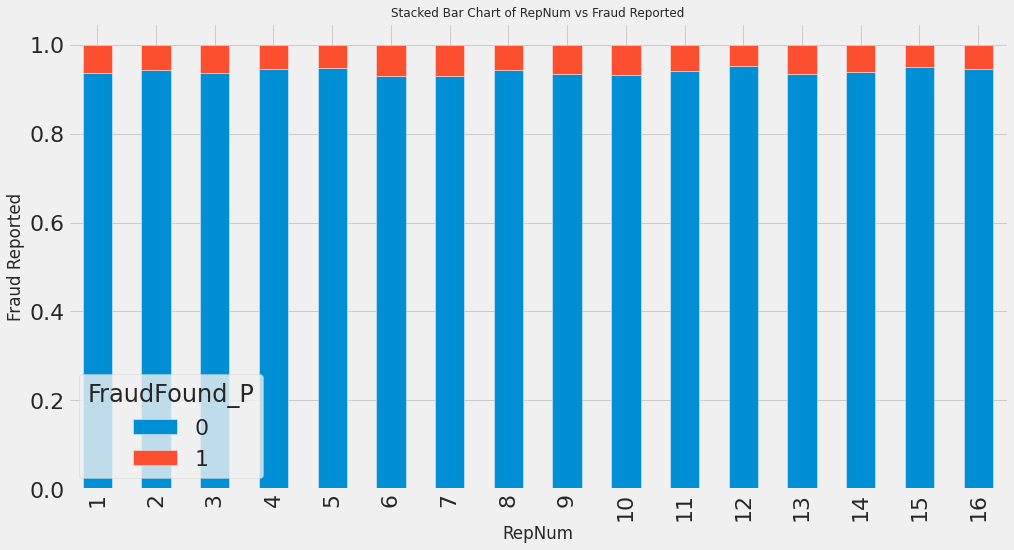

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.RepNumber, df.FraudFound_P)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of RepNum vs Fraud Reported', fontsize=12)
plt.xlabel('RepNum')
plt.ylabel('Fraud Reported')
plt.show()

####3. Preprocessing Data

In [ ]:
#drop irrelavant attributes
df.drop(['PolicyNumber','RepNumber','Year'], inplace=True, axis=1)

"PolicyNumber" are unique IDs associated with each record, there's no actual meaning.

"RepNumber" shows which insurance sales representative sale each policy, while by visualizing the proportion of fraud for each representatives, there's no significant correlations identified.

"Year" just tells us 3 years of claims data are collected for our analysis, intuitively it does not help with predictions for future years (unless there's yearly trend for which 3 years of data are not sufficient)


In [ ]:
#drop correlated attributes
df.drop(['Month','WeekOfMonth','DayOfWeek'], inplace=True, axis=1)

Month/WeekOfMonth/DayOfWeek are correlated to MonthClaimed/WeekOfMonthClaimed/DayOfWeekClaimed, and the latter may provide more information about fraud claims

In [ ]:
# adjust age 0 records - check "AgeOfPolicyHolder"
age_0 = df["Age"] == 0
df_age_0 = df[age_0]
df_age_0.AgeOfPolicyHolder.value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

These records with age=0 are all showing "16 to 17" in AgeOfPolicyHolder, although the policyholder is not necessarily the people who has an accident.  we will use 16 to replace these 0 ages for simplicity.

In [ ]:
df.Age = df.Age.replace(0, 16)

In [ ]:
#Normalize numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df[['Age','Deductible','DriverRating']])
df[['Age','Deductible','DriverRating']] = pd.DataFrame(scaler.transform(df[['Age','Deductible','DriverRating']]))
df

,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Honda,Urban,Tuesday,Jan,1,Female,Single,-1.513298,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Honda,Urban,Monday,Jan,4,Male,Single,-0.488015,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Honda,Urban,Thursday,Nov,2,Male,Married,0.537269,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Toyota,Rural,Friday,Jul,1,Male,Married,1.956892,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Honda,Urban,Tuesday,Feb,2,Female,Single,-1.040090,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Toyota,Urban,Tuesday,Nov,5,Male,Married,-0.409147,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Pontiac,Urban,Friday,Dec,1,Male,Married,-0.803487,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Toyota,Rural,Friday,Dec,1,Male,Single,-1.276694,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Toyota,Urban,Thursday,Dec,2,Female,Married,-0.488015,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [ ]:
#Transfer the rest of numeric features to Categorical
df['WeekOfMonthClaimed']=pd.Categorical(df.WeekOfMonthClaimed)
df.dtypes

Make                      object
AccidentArea              object
DayOfWeekClaimed          object
MonthClaimed              object
WeekOfMonthClaimed      category
Sex                       object
MaritalStatus             object
Age                      float64
Fault                     object
PolicyType                object
VehicleCategory           object
VehiclePrice              object
FraudFound_P               int64
Deductible               float64
DriverRating             float64
Days_Policy_Accident      object
Days_Policy_Claim         object
PastNumberOfClaims        object
AgeOfVehicle              object
AgeOfPolicyHolder         object
PoliceReportFiled         object
WitnessPresent            object
AgentType                 object
NumberOfSuppliments       object
AddressChange_Claim       object
NumberOfCars              object
BasePolicy                object
dtype: object

One Hot Encoding

In [ ]:
from sklearn.model_selection import train_test_split

#use OHE to transfer categorical features into 0/1
X=df[df.columns.drop('FraudFound_P')]
X=pd.get_dummies(data=X,drop_first=True)
y=df['FraudFound_P']


##III. Data Allocation

Split data into train set (70%), validation set (15%) and test set (15%)

In [ ]:
X.columns

Index(['Age', 'Deductible', 'DriverRating', 'Make_BMW', 'Make_Chevrolet',
       'Make_Dodge', 'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar',
       ...
       'AddressChange_Claim_2 to 3 years', 'AddressChange_Claim_4 to 8 years',
       'AddressChange_Claim_no change', 'AddressChange_Claim_under 6 months',
       'NumberOfCars_2 vehicles', 'NumberOfCars_3 to 4', 'NumberOfCars_5 to 8',
       'NumberOfCars_more than 8', 'BasePolicy_Collision',
       'BasePolicy_Liability'],
      dtype='object', length=106)

In [ ]:
#Split Train Data (70%)
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, 
    test_size=0.3, random_state=1)

In [ ]:
#Split Holdout Data & Test Data (15% Each)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, 
    test_size=0.5, random_state=1)

After OHE, we got 142 feature. We want to reduce dimensionality and avoid potetial correlations among features. We're going to use MCA for reducing categorical features and PCA for continous feature.

## IV. Dimensionality reduction

###a. Drop highly correlated variables and choose significant variables

In [ ]:
#Drop variables with high correlation
all_col=list(X_train.columns)
orig_df=X
dropped=[]
for col in all_col:
  cor_matrix = orig_df.corr().abs()
  upper_tri= cor_matrix.where(np.triu(np.ones(
      cor_matrix.shape),k=1).astype(bool))
  if any(upper_tri[col] > 0.8):
    all_col.remove(col)
    orig_df=orig_df[all_col]
    dropped.append(col)

dropped

['MaritalStatus_Single',
 'VehicleCategory_Sport',
 'NumberOfCars_2 vehicles',
 'BasePolicy_Collision']

In [ ]:
X_train2= X_train.drop(X_train[dropped], axis=1)
X_val2= X_val.drop(X_val[dropped], axis=1)
X_test2= X_test.drop(X_test[dropped], axis=1)

In [ ]:
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
#Check p-values from all variables
model=sm.GLM(y_train,X_train2,family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           FraudFound_P   No. Observations:                10794
Model:                            GLM   Df Residuals:                    10695
Model Family:                Binomial   Df Model:                           98
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1905.8
Date:                Mon, 12 Dec 2022   Deviance:                       3811.7
Time:                        23:49:43   Pearson chi2:                 9.77e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Age 

In [ ]:
significant_var = model.pvalues[model.pvalues <= 0.05].index[1:] 
print(significant_var)

Index(['Make_Pontiac', 'Make_Toyota', 'Make_VW', 'MaritalStatus_Married',
       'Fault_Third Party', 'PolicyType_Sedan - Collision',
       'VehiclePrice_40000 to 59000', 'AgeOfPolicyHolder_26 to 30',
       'AddressChange_Claim_2 to 3 years'],
      dtype='object')


##V. Model Fitting & Selection

####a) Logistic Regression

In [ ]:
X_train_lr=sm.add_constant(X_train[['Make_Pontiac', 'Make_Toyota', 'Make_VW', 'MaritalStatus_Married',
       'Fault_Third Party', 'PolicyType_Sedan - Collision',
       'VehiclePrice_40000 to 59000', 'AgeOfPolicyHolder_26 to 30',
       'AddressChange_Claim_2 to 3 years']])

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train_lr,y_train)

X_val_lr=sm.add_constant(X_val[['Make_Pontiac', 'Make_Toyota', 'Make_VW', 'MaritalStatus_Married',
       'Fault_Third Party', 'PolicyType_Sedan - Collision',
       'VehiclePrice_40000 to 59000', 'AgeOfPolicyHolder_26 to 30',
       'AddressChange_Claim_2 to 3 years']])
y_pred=pd.Series(model.predict(X_val_lr))
#y_val=y_val.reset_index(drop=True)

z=pd.concat([y_val,y_pred],axis=1)
z.columns=['True','Prediction']
z.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,True,Prediction
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_val, y_pred)

In [ ]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))

Accuracy 0.9316904453091224
Precision 0.0
Recall 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



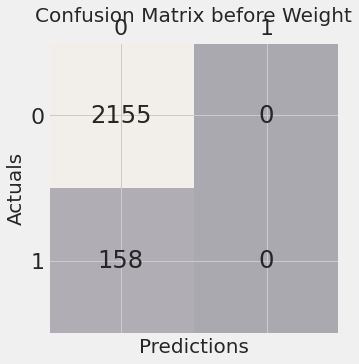

In [ ]:
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix before Weight', fontsize=20)
plt.show()

Logistic regression with balanced weight

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#Using balanced weight

model2=LogisticRegression(solver='newton-cg', class_weight='balanced')
model2.fit(X_train_lr,y_train)

#X_val=sm.add_constant(X_val[['Make_Pontiac', 'Make_Toyota', 'Make_VW', 'MaritalStatus_Married',
#       'Fault_Third Party', 'PolicyType_Sedan - Collision',
#       'VehiclePrice_40000 to 59000', 'AgeOfPolicyHolder_26 to 30',
#       'AddressChange_Claim_2 to 3 years']])
y_pred=pd.Series(model2.predict(X_val_lr))
#y_val=y_val.reset_index(drop=True)

z=pd.concat([y_val,y_pred],axis=1)
z.columns=['True','Prediction']
z.head()
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score(y_val, y_pred))

Accuracy 0.3687851275399914
Precision 0.09413965087281795
Recall 0.9556962025316456
F1 score 0.17139614074914872


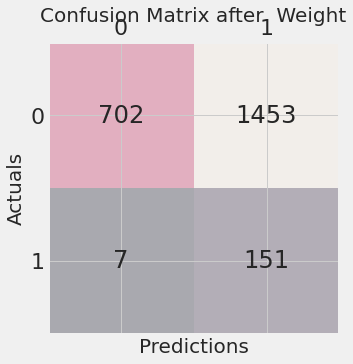

In [ ]:
conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix after  Weight', fontsize=20)
plt.show()

Grid search for weight

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Scoring for different class weights')

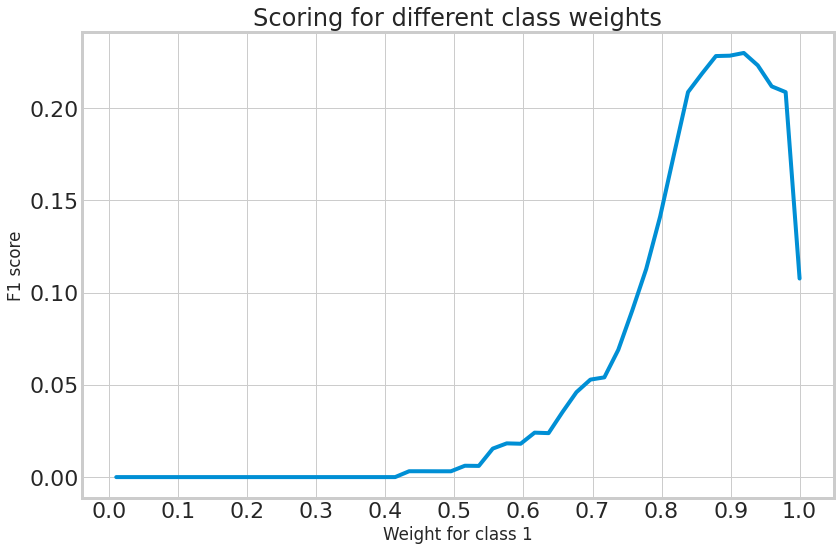

In [ ]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train2, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

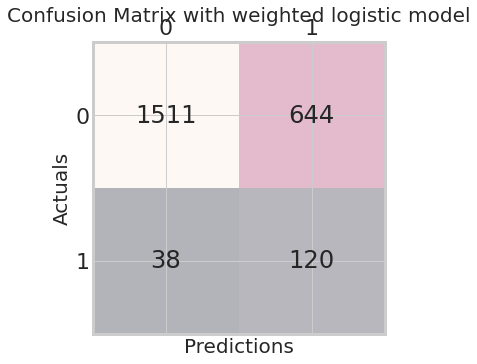

Accuracy 0.7051448335495029
Precision 0.15706806282722513
Recall 0.759493670886076
F1 score 0.2603036876355748


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model3 = LogisticRegression(solver='newton-cg', class_weight={0: 0.075, 1: 0.925})
model3.fit(X_train2,y_train)
y_pred=pd.Series(model3.predict(X_val2))

conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with weighted logistic model', fontsize=20)
plt.show()


from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score( y_pred, y_val))

####b) K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train2, y_train)
y_pred= model4.predict(X_val2)

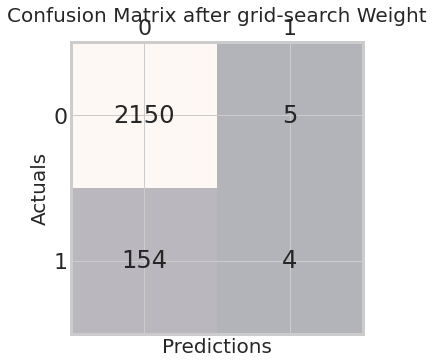

In [ ]:
conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix after grid-search Weight', fontsize=20)
plt.show()

In [ ]:
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score( y_pred, y_val))

Accuracy 0.9312581063553826
Precision 0.4444444444444444
Recall 0.02531645569620253
F1 score 0.04790419161676646


Using Near Miss for undersampling

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
from imblearn.under_sampling import NearMiss

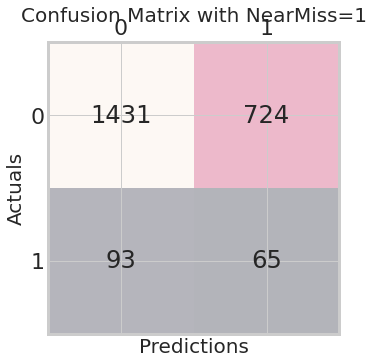

In [ ]:
#NearMiss1
undersample= NearMiss(version=1, n_neighbors=4)
X,Y = undersample.fit_resample(X_train2, y_train)
model5 = KNeighborsClassifier(n_neighbors=11)
model5.fit(X, Y)
y_pred= model5.predict(X_val2)
conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with NearMiss=1', fontsize=20)
plt.show()

In [ ]:
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score( y_pred, y_val))

Accuracy 0.646779074794639
Precision 0.08238276299112801
Recall 0.41139240506329117
F1 score 0.13727560718057022


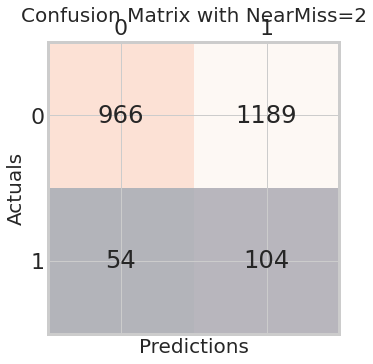

Accuracy 0.4626026805015132
Precision 0.08043310131477185
Recall 0.6582278481012658
F1 score 0.14334941419710545


In [ ]:
#Nearmiss 2
undersample= NearMiss(version=2, n_neighbors=4)
X,Y = undersample.fit_resample(X_train2, y_train)
model6 = KNeighborsClassifier(n_neighbors=12)
model6.fit(X, Y)
y_pred= model6.predict(X_val2)
conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with NearMiss=2', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score( y_pred, y_val))

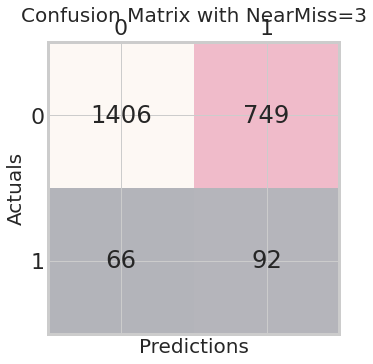

Accuracy 0.6476437527021185
Precision 0.10939357907253269
Recall 0.5822784810126582
F1 score 0.1841841841841842


In [ ]:
#Nearmiss 3
undersample= NearMiss(version=3, n_neighbors=4)
X,Y = undersample.fit_resample(X_train2, y_train)
model7 = KNeighborsClassifier(n_neighbors=4)
model7.fit(X, Y)
y_pred= model7.predict(X_val2)
conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with NearMiss=3', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score( y_pred, y_val))

In [ ]:
#NearMiss 3 and find optimal K using elbow method
#Nearmiss 3
f1=[]
for i in range(1,10):
  undersample= NearMiss(version=3, n_neighbors=i)
  X,Y = undersample.fit_resample(X_train2, y_train)
  model7 = KNeighborsClassifier(n_neighbors=i)
  model7.fit(X, Y)
  y_pred= model7.predict(X_val2)
  f1.append(f1_score( y_pred, y_val))

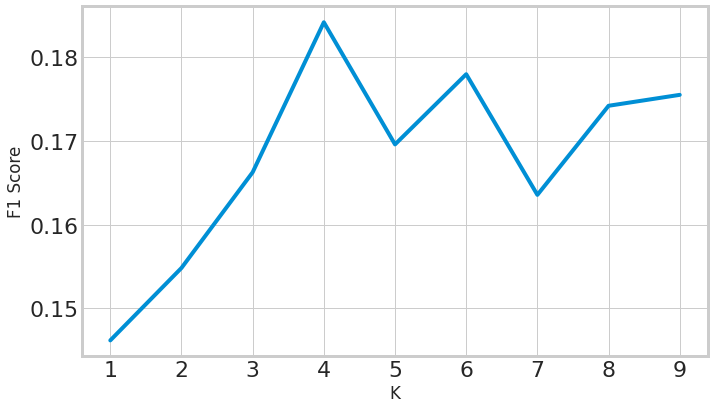

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,10),f1)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()

####c) Support Vector Machines

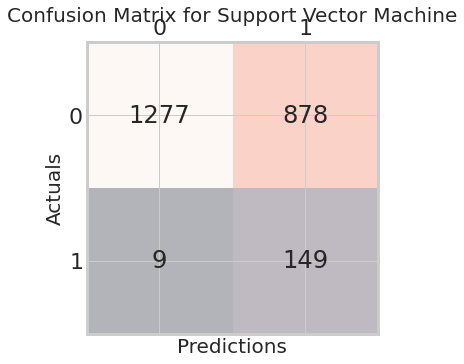

Accuracy 0.6165153480328578
Precision 0.1450827653359299
Recall 0.9430379746835443
F1 score 0.2514767932489452


In [ ]:
from sklearn.svm import SVC

model8= SVC(class_weight={0: 0.075, 1: 0.925})
model8.fit(X_train2, y_train)
y_pred = model8.predict(X_val2)

conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix for Support Vector Machine', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score( y_pred, y_val))


####d) Decision Trees

In [ ]:
from sklearn import tree

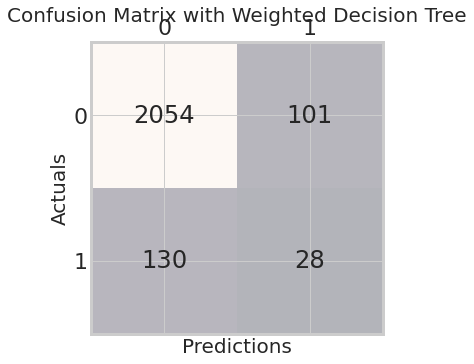

Accuracy 0.9001297016861219
Precision 0.21705426356589147
Recall 0.17721518987341772
F1 score 0.1951219512195122


In [ ]:
model10 = tree.DecisionTreeClassifier(class_weight={0: 0.05, 1: 0.95})
model10= model10.fit(X_train2, y_train)
y_predval_dtc=model10.predict(X_val2)


conf_matrix= confusion_matrix(y_val, y_predval_dtc)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Weighted Decision Tree', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val, y_predval_dtc))
print("Precision", metrics.precision_score(y_val, y_predval_dtc))
print("Recall", metrics.recall_score(y_val, y_predval_dtc))
print("F1 score", f1_score(y_val, y_predval_dtc))

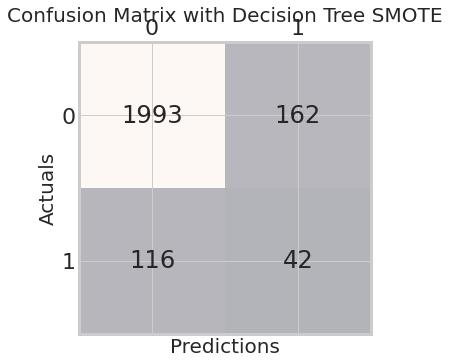

Accuracy 0.8798097708603545
Precision 0.20588235294117646
Recall 0.26582278481012656
F1 score 0.2320441988950276


In [ ]:
#Decision Tree using SMOTE oversampling

from imblearn. over_sampling import SMOTE

model10 = tree.DecisionTreeClassifier()
X_train3, y_train3= SMOTE().fit_resample(X_train2,y_train)
model10= model10.fit(X_train3, y_train3)
y_predval_dtc=model10.predict(X_val2)


conf_matrix= confusion_matrix(y_val, y_predval_dtc)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Decision Tree SMOTE', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val, y_predval_dtc))
print("Precision", metrics.precision_score(y_val, y_predval_dtc))
print("Recall", metrics.recall_score(y_val, y_predval_dtc))
print("F1 score", f1_score(y_val, y_predval_dtc))


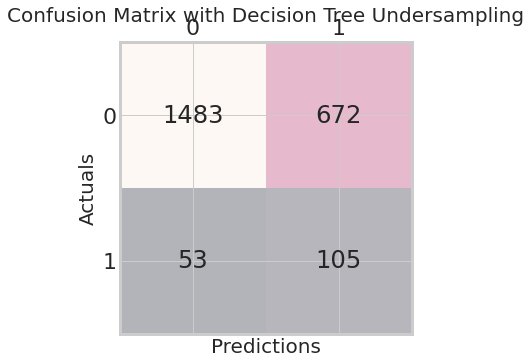

Accuracy 0.6865542585386943
Precision 0.13513513513513514
Recall 0.6645569620253164
F1 score 0.22459893048128346


In [ ]:
#Decision Tree using undersampling

from imblearn. under_sampling import RandomUnderSampler

model10 = tree.DecisionTreeClassifier()
rus= RandomUnderSampler(random_state=0)
X_train3, y_train3= rus.fit_resample(X_train2,y_train)
model10= model10.fit(X_train3, y_train3)
y_predval_dtc=model10.predict(X_val2)


conf_matrix= confusion_matrix(y_val, y_predval_dtc)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Decision Tree Undersampling', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val, y_predval_dtc))
print("Precision", metrics.precision_score(y_val, y_predval_dtc))
print("Recall", metrics.recall_score(y_val, y_predval_dtc))
print("F1 score", f1_score(y_val, y_predval_dtc))


####e) Random Forest

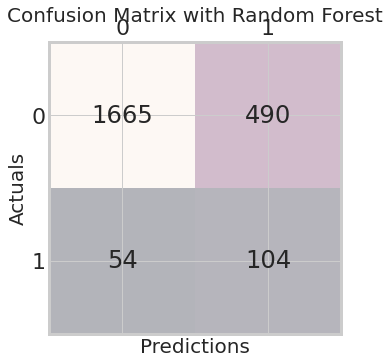

Accuracy 0.7648076091655858
Precision 0.1750841750841751
Recall 0.6582278481012658
F1 score 0.2765957446808511


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model11 = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140,class_weight={0: 0.07, 1: 0.93})
model11.fit(X_train2, y_train)
y_pred = model11.predict(X_val2)

conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Random Forest', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val, y_pred))
print("Precision", metrics.precision_score(y_val, y_pred))
print("Recall", metrics.recall_score(y_val, y_pred))
print("F1 score", f1_score(y_val, y_pred))

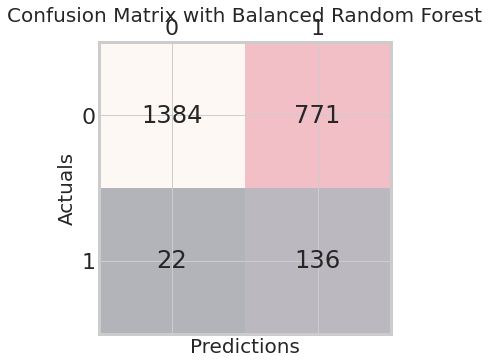

Accuracy 0.6571552096843926
Precision 0.14994487320837926
Recall 0.8607594936708861
F1 score 0.2553990610328638


In [ ]:
#BRF
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
scoring = ('f1', 'recall', 'precision')
model12 = BalancedRandomForestClassifier(n_estimators=140, random_state=0)

model12.fit(X_train3, y_train3)
y_pred = model12.predict(X_val2)

conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Balanced Random Forest', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val, y_pred))
print("Precision", metrics.precision_score(y_val, y_pred))
print("Recall", metrics.recall_score(y_val, y_pred))
print("F1 score", f1_score(y_val, y_pred))

####f)Isolation Forest

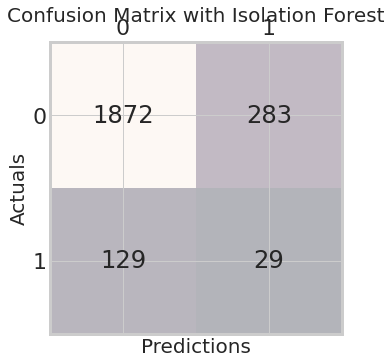

Accuracy 0.8218763510592304
Precision 0.09294871794871795
Recall 0.18354430379746836
F1 score 0.12340425531914895


In [ ]:
from sklearn.ensemble import IsolationForest

model13 = IsolationForest(n_estimators=5, random_state=0).fit(X_train)
y_pred = model13.predict(X_val)
y_pred = [1 if i==-1 else 0 for i in y_pred]

#result
conf_matrix= confusion_matrix(y_val, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Isolation Forest', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))
print("F1 score", f1_score(y_val, y_pred))

####g) One-class SVM


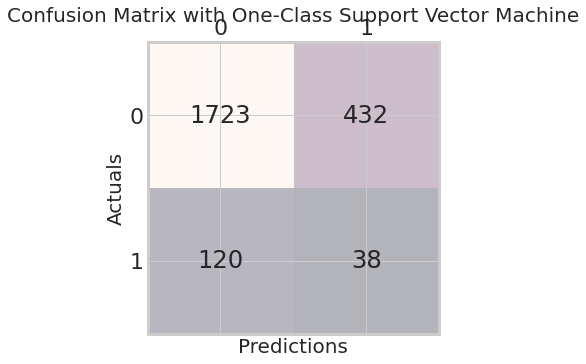

Accuracy 0.7613488975356679
Precision 0.08085106382978724
Recall 0.24050632911392406
F1 score 0.12101910828025478


In [ ]:
from sklearn.svm import OneClassSVM

model9 = OneClassSVM(degree=3, nu=0.2)

# fit on majority class
X_train_svm = X_train2[y_train==0]
model9.fit(X_train_svm)

#make prediction
svm_pred=model9.predict(X_val2)
svm_pred = [1 if i==-1 else 0 for i in svm_pred]

#result
conf_matrix= confusion_matrix(y_val, svm_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with One-Class Support Vector Machine', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_val, svm_pred))
print("Precision", metrics.precision_score(y_val, svm_pred))
print("Recall", metrics.recall_score(y_val, svm_pred))
print("F1 score", f1_score(y_val, svm_pred))


##VI. Model Testing

Based on the performance of candidate models on validation set, we selected Weighted Logistic Regression (model3), weighted SVM (model8), weighted random forest (model11) and balanced random forest (model 12)

Finally, we would like to see how these models perform on test set

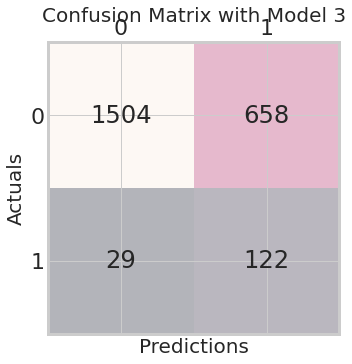

Accuracy 0.7029831387808041
Precision 0.1564102564102564
Recall 0.8079470198675497
F1 score 0.26208378088077333


In [ ]:
y_pred = model3.predict(X_test2)

conf_matrix= confusion_matrix(y_test, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Model 3', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1 score", f1_score(y_test, y_pred))

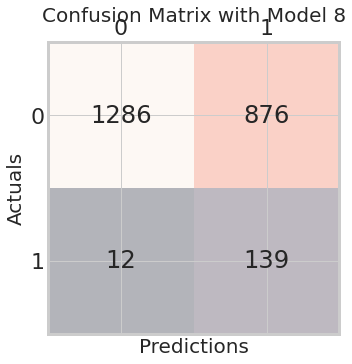

Accuracy 0.6160830090791181
Precision 0.13694581280788176
Recall 0.9205298013245033
F1 score 0.23842195540308747


In [ ]:
y_pred = model8.predict(X_test2)

conf_matrix= confusion_matrix(y_test, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Model 8', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1 score", f1_score(y_test, y_pred))

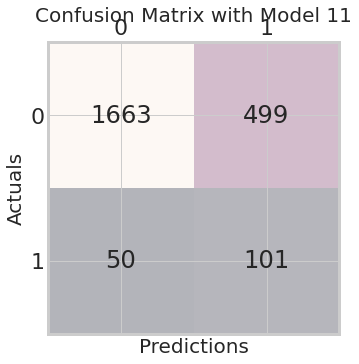

Accuracy 0.7626459143968871
Precision 0.16833333333333333
Recall 0.6688741721854304
F1 score 0.26897470039946736


In [ ]:
y_pred = model11.predict(X_test2)

conf_matrix= confusion_matrix(y_test, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Model 11', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1 score", f1_score(y_test, y_pred))

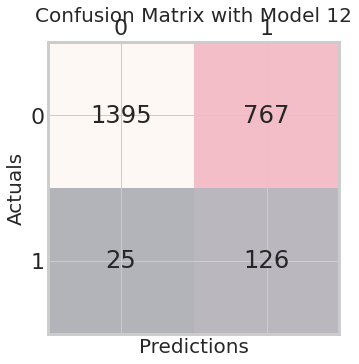

Accuracy 0.6575875486381323
Precision 0.14109742441209405
Recall 0.8344370860927153
F1 score 0.24137931034482757


In [ ]:
y_pred = model12.predict(X_test2)

conf_matrix= confusion_matrix(y_test, y_pred)
ig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix with Model 12', fontsize=20)
plt.show()
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1 score", f1_score(y_test, y_pred))

The results are all similar to their corresponsing validation result, suggesting little or no overfiting problems.